In [42]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import DBSCAN

In [6]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv")

df.shape

(4406, 2)

In [7]:
df.head()

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376


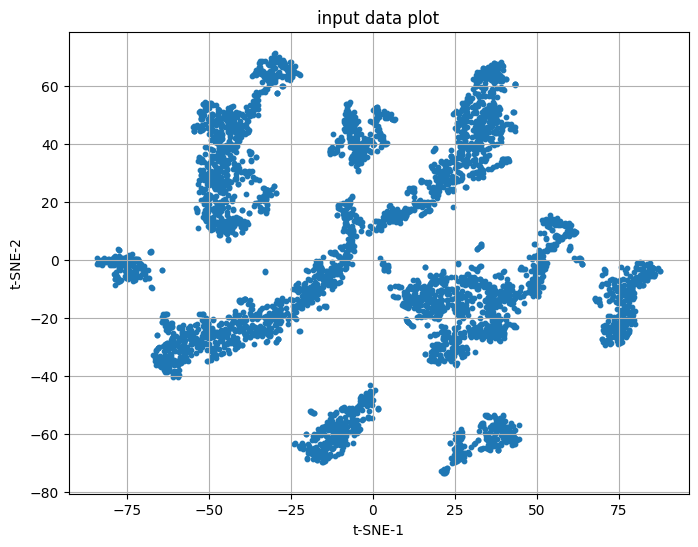

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(df['t-SNE-1'], df['t-SNE-2'], s=10)
plt.title('input data plot')
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.grid(True)
plt.show()

In [26]:
neigbors= NearestNeighbors(n_neighbors=5).fit(df)
distances , indices = neigbors.kneighbors(df)

k_distances = np.sort(distances[:, 4])

In [38]:
k_distances

array([ 0.18884391,  0.20602739,  0.28949417, ...,  5.85066405,
       10.48484593, 10.5479535 ])

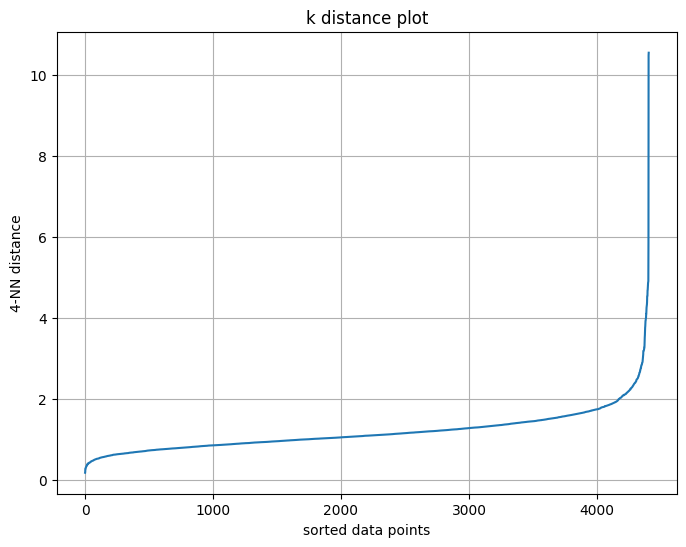

In [41]:
plt.figure(figsize=(8,6))
plt.plot(k_distances)
plt.title('k distance plot')
plt.xlabel('sorted data points')
plt.ylabel('4-NN distance')
plt.grid(True)
plt.show()

In [52]:
kneedle = KneeLocator(range(len(k_distances)), k_distances, curve='convex', direction='increasing')
optimal_eps = k_distances[kneedle.knee]
print(f"Optimal eps: {optimal_eps}")

Optimal eps: 3.19398172110565


In [53]:
db = DBSCAN(eps=3.2, min_samples=4).fit(df)

labels = db.labels_

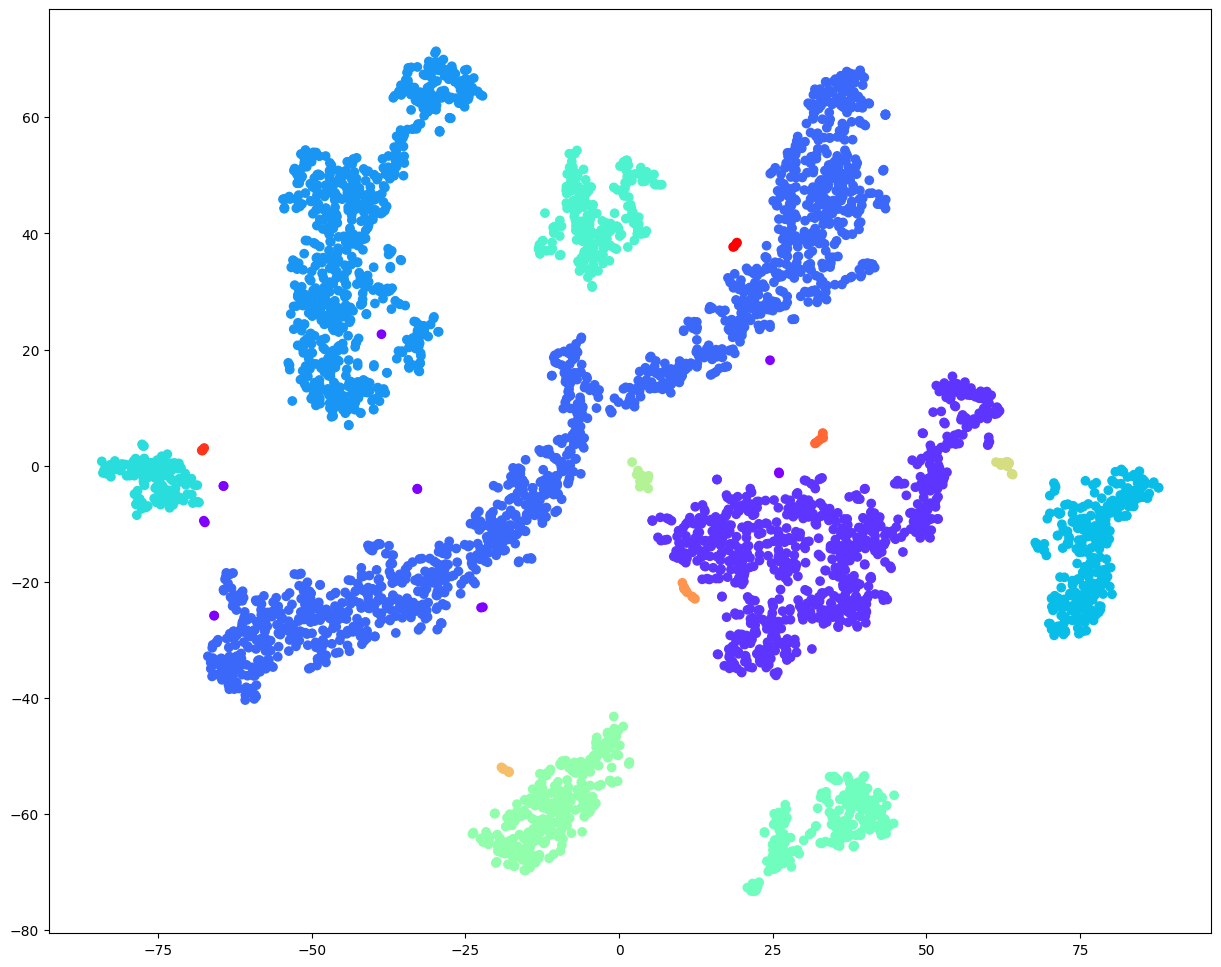

In [54]:
plt.figure(figsize=(15, 12))
plt.scatter(df['t-SNE-1'], df['t-SNE-2'], c=labels, cmap='rainbow')
plt.show()